In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


###### Project_of_aazad

# Importing Library and input data


In [3]:
import numpy as np 
import pandas as pd 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import timeit
import time
start_time = time.time()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
start = timeit.default_timer()
train= pd.read_csv('My Drive/Project Bike Sharing/train.csv')
test = pd.read_csv('My Drive/Project Bike Sharing/test.csv')

# Preprocessing Data

In [5]:
joined = train.append(test,ignore_index=True)

In [6]:
print(joined.info())
print(train.isnull().values.any())
print(test.isnull().values.any())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.6+ MB
None
False
False
             season       holiday  ...    registered         count
count  10886.000000  10886.000000  ...  10886.000000  10886.000000
mean       2.506614      0.028569  ...    155.552177    191.574132
std        1.116174      0.166599  ..

In [7]:
joined

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


##### Root mean square log error function is used for evaluation.

In [8]:
# Root mean square log error function is used for evaluation.
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

##### Converting datetime to day month year hour


In [9]:
joined['Month'] = joined['datetime'].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month)
joined['Hour'] = joined['datetime'].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)
joined['Weekday'] = joined['datetime'].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday())

In [10]:
joined

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Month,Hour,Weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,12,19,0
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,12,20,0
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,12,21,0
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,12,22,0


In [11]:
print(joined.info())
print(joined.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  Month       17379 non-null  int64  
 13  Hour        17379 non-null  int64  
 14  Weekday     17379 non-null  int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 2.0+ MB
None
             season       holiday  ...          Hour       Weekday
count  17379.000000  17379.000000  ...  17379.000000  17379.

###### dropping datetime and Train test split

In [12]:
datetimecol = test["datetime"]

joined.drop('datetime',inplace=True,axis=1)
train = joined[ joined['count'].notnull()]
test = joined[ joined['count'].isnull()]

In [13]:
print(train.isnull().values.any())
print(train.info())
print(train.describe())

False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  float64
 9   registered  10886 non-null  float64
 10  count       10886 non-null  float64
 11  Month       10886 non-null  int64  
 12  Hour        10886 non-null  int64  
 13  Weekday     10886 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 1.2 MB
None
             season       holiday  ...          Hour       Weekday
count  10886.000000  10886.000000  ...  10886.000000  10886.000000
mean       2.506614      0.028569  ...  

In [14]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Month,Hour,Weekday
0,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7.0,329.0,336.0,12,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10.0,231.0,241.0,12,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4.0,164.0,168.0,12,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12.0,117.0,129.0,12,22,2


In [15]:
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Month,Hour,Weekday
10886,1,0,1,1,10.66,11.365,56,26.0027,NaN,NaN,NaN,1,0,3
10887,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN,1,1,3
10888,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN,1,2,3
10889,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN,1,3,3
10890,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,12,19,0
17375,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,12,20,0
17376,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,12,21,0
17377,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,12,22,0


# Data Visualization

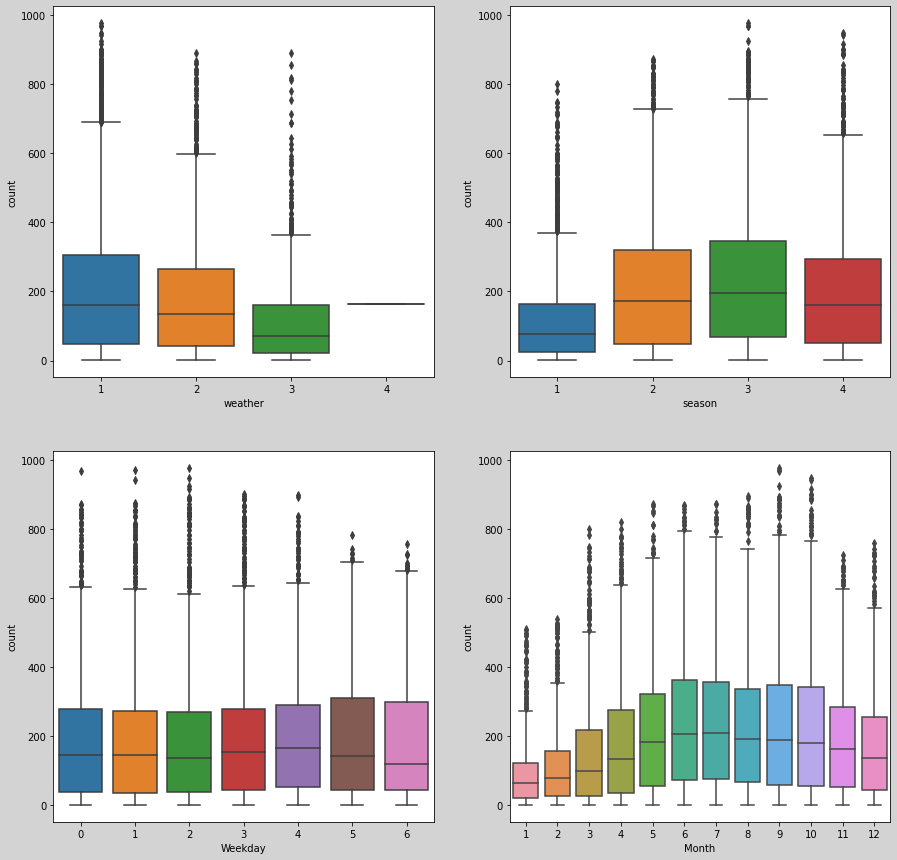

In [16]:
fig,axes= plt.subplots(2,2,figsize=(15,15),facecolor='lightgrey',edgecolor='black')
sns.boxplot(data=train, y='count',x='weather',ax=axes[0,0])
sns.boxplot(data=train, y='count',x='season',ax=axes[0,1])
sns.boxplot(data=train, y='count',x='Weekday',ax=axes[1,0])
sns.boxplot(data=train, y='count',x='Month',ax=axes[1,1])
plt.savefig('My Drive/Project Bike Sharing/Boxplot.jpg',facecolor='lightgrey',edgecolor='black')
plt.show()

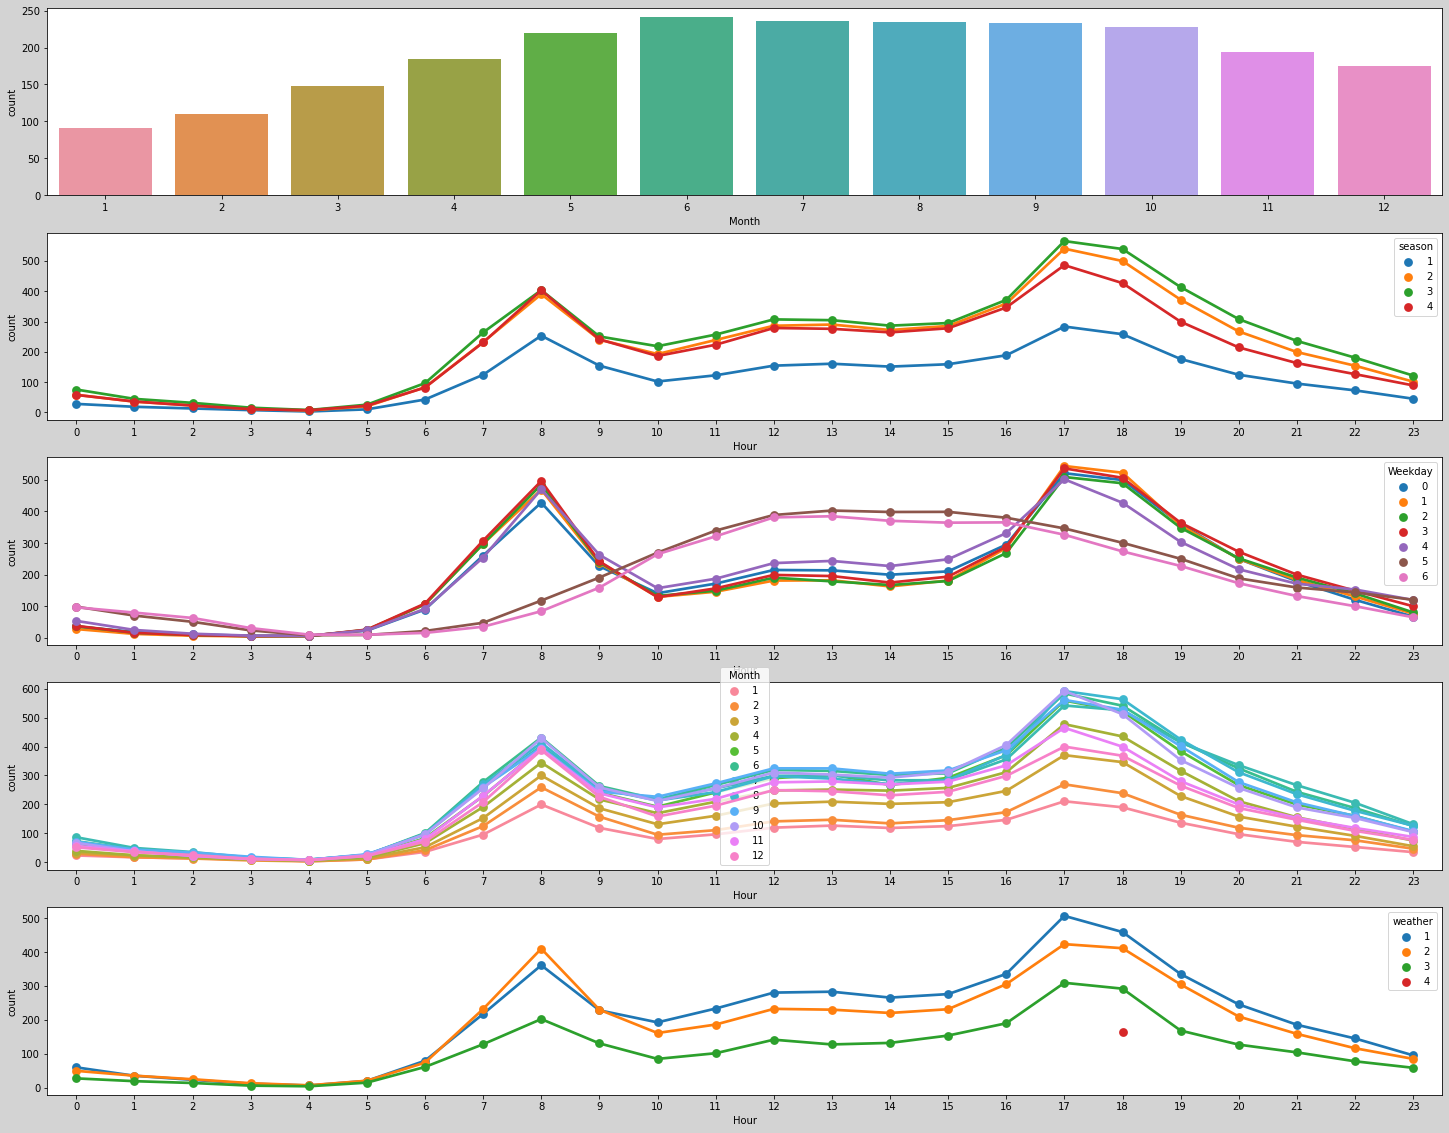

In [17]:
Month_grouped = train[['count','Month']].groupby('Month',as_index=False).mean()
Hour_season_grouped = (train.groupby(["Hour","season"],as_index=False)["count"].mean())
Hour_Weekday_grouped = (train.groupby(["Hour","Weekday"],as_index=False)["count"].mean())
Hour_Month_grouped = (train.groupby(["Hour","Month"],as_index=False)["count"].mean())
Hour_weather_grouped = (train.groupby(["Hour","weather"],as_index=False)["count"].mean())

fig,axes= plt.subplots(5,1,figsize=(25,20),facecolor='lightgrey',edgecolor='black')
sns.barplot( x = Month_grouped['Month'], y = Month_grouped['count'], ax=axes[0])
sns.pointplot( y = Hour_season_grouped['count'], x = Hour_season_grouped['Hour'],  hue=Hour_season_grouped['season'], join=True,ax=axes[1])
sns.pointplot( y = Hour_Weekday_grouped['count'], x = Hour_Weekday_grouped['Hour'],  hue=Hour_Weekday_grouped['Weekday'], join=True,ax=axes[2])
sns.pointplot( y = Hour_Month_grouped['count'], x = Hour_Month_grouped['Hour'],  hue=Hour_Month_grouped['Month'], join=True,ax=axes[3])
sns.pointplot( y = Hour_weather_grouped['count'], x = Hour_weather_grouped['Hour'],  hue=Hour_weather_grouped['weather'], join=True,ax=axes[4])
plt.savefig('My Drive/Project Bike Sharing/barplot-pointplot.png',facecolor='lightgrey',edgecolor='black')
plt.show()



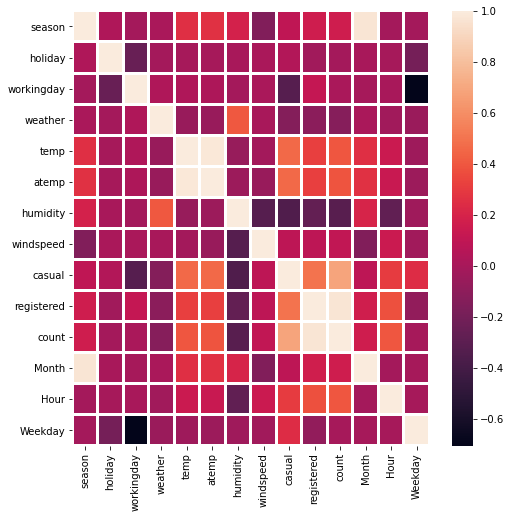

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(data=train.corr(), linewidths=2)
plt.savefig('My Drive/Project Bike Sharing/heatmap.png',dpi=900,facecolor='lightgrey',edgecolor='black')
plt.show()

## Outlier Removal and Train test split

In [19]:
""" Removing Outliers """
train['humidity']=train['humidity'].replace([0],61) 
train['windspeed']=train['windspeed'].replace([56.9969],20)

# As casual+register = count and atemp is highly correlated with temp so we will drop them all :P
test.drop(['casual','registered','count','atemp'],inplace=True,axis=1)
train.drop(['casual','registered','atemp'],inplace=True,axis=1)
X = train.drop('count',axis=1)
y = train['count']

# "train_test_split"
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

# Model fitting and Performance 

In [20]:
# Gradient Boosted Regression


gbreg = GradientBoostingRegressor()
param_grid = {'n_estimators': [2400,2600],'learning_rate':[0.5,0.3,0.2,0.1,0.01,0.001,0.0001]}
CV_gbreg = GridSearchCV(estimator=gbreg,param_grid=param_grid,cv=5)
CV_gbreg.fit(X=X_train,y=np.log1p(y_train))
print("Best Paramters for Gradient boosted regression: ",CV_gbreg.best_params_)
preds = CV_gbreg.predict(X=X_test)
print ("RMSLE Value for Gradient Boosted Regression: ",  rmsle( np.exp([max(x,0) for x in preds]) ,y_test,False))


Best Paramters for Gradient boosted regression:  {'learning_rate': 0.1, 'n_estimators': 2600}
RMSLE Value for Gradient Boosted Regression:  0.3386157989914823


In [21]:
# Lasso Regression


lasso = Lasso()
alpha = [0.001,0.005,0.01,0.3,0.1,0.3,0.5,0.7]
lasso_param_grid = {'alpha':alpha, 'max_iter':[1000]}
grid_lasso = GridSearchCV(lasso, lasso_param_grid, cv=5)
grid_lasso.fit(X=X_train,y=np.log1p(y_train))
preds = grid_lasso.predict(X=X_test)
print ("Best Paramters for Lasso Regression: ",grid_lasso.best_params_)
print ("RMSLE Value for Lasso regression: ",  rmsle( np.exp([max(x,0) for x in preds]) ,y_test,False))

Best Paramters for Lasso Regression:  {'alpha': 0.01, 'max_iter': 1000}
RMSLE Value for Lasso regression:  1.0166054796245834


In [22]:

# Ridge Regression


ridge = Ridge()
ridge_params = {'max_iter':[3000],'alpha':[0.1,1,2,3,4,10,30,100,200,300,400,800,900,1000]}
grid_ridge = GridSearchCV(ridge, ridge_params, cv=5)
grid_ridge.fit(X_train, np.log1p(y_train))
preds = grid_ridge.predict(X=X_test)
print ("Best Paramters for Ridge Regression: ",grid_ridge.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle( np.exp([max(x,0) for x in preds]) ,y_test,False))


Best Paramters for Ridge Regression:  {'alpha': 1000, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  1.016260846626877


In [23]:


# Random Forest Regression

rfreg = RandomForestRegressor()
param_grid = {'n_estimators': np.arange(495,500)}
grid_random_forest = GridSearchCV(rfreg, param_grid, cv=5)
grid_random_forest.fit(X=X_train, y= np.log1p(y_train))
preds = grid_random_forest.predict(X=X_test)
print("Best Paramters for Random Forest Regression: ", grid_random_forest.best_params_)
print("RMSLE Value for Random forest regression: ",  rmsle( np.exp([max(x,0) for x in preds]) ,y_test,False))




Best Paramters for Random Forest Regression:  {'n_estimators': 496}
RMSLE Value for Random forest regression:  0.37094111460237045


In [24]:

# Linear Regression


linreg = LinearRegression()
linreg.fit(X=X_train, y=np.log1p(y_train))
y_pred = linreg.predict(X=X_test)
print ("RMSLE Value for linear regression: ",  rmsle( np.exp([max(x,0) for x in preds]) ,y_test,False))


RMSLE Value for linear regression:  0.37094111460237045


In [25]:

stop = timeit.default_timer()

print (stop - start)

elapsed_time = time.time() - start_time
print(time.strftime("Time Taken = Hours %H: minuts %M: seconds %S", time.gmtime(elapsed_time)))

1425.091318488
Time Taken = Hours 00: minuts 23: seconds 45
